<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Files to be imported -->

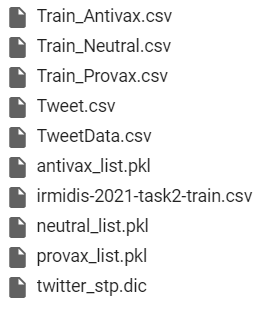

# Import Data files

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("irmidis-2021-task2-train.csv")
# from sklearn.utils import shuffle
# our_data = shuffle(our_data)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2792 non-null   int64 
 1   tweet   2792 non-null   object
 2   label   2792 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.6+ KB
None


,id,tweet,label
0,1325682517148569600,Coronavirus: Some Canadians hesitant to take a...,AntiVax
1,1325684180483600384,Moderna on track to report late-stage COVID-19...,Neutral
2,1325689685943996416,The Philippine government is in talks with Ang...,Neutral
3,1325690517724782593,Care homes to be FIRST to receive coronavirus ...,Neutral
4,1325697646909132800,This is why thinking that a vaccine is a panac...,AntiVax


In [ ]:
data = pd.read_csv("merged.csv")
# from sklearn.utils import shuffle
# our_data = shuffle(our_data)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16355 entries, 0 to 16354
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              16355 non-null  float64
 1   agreement             16355 non-null  float64
 2   num_labels            16355 non-null  int64  
 3   label                 16355 non-null  int64  
 4   tweet_id.1            16355 non-null  float64
 5   screen name           16355 non-null  object 
 6   user id               16355 non-null  float64
 7   reply to screen name  16355 non-null  object 
 8   retweet count         16355 non-null  float64
 9   followers             16355 non-null  float64
 10  friends               16355 non-null  float64
 11  status count          16355 non-null  float64
 12  verified              16355 non-null  bool   
 13  protected             16355 non-null  bool   
 14  tweet                 16353 non-null  object 
dtypes: bool(2), float64

,tweet_id,agreement,num_labels,label,tweet_id.1,screen name,user id,reply to screen name,retweet count,followers,friends,status count,verified,protected,tweet
0,7.851350e+17,0.666667,3,0,7.850000e+17,idkag_,1.223791e+09,mandahhplease,0.0,1976.0,781.0,25293.0,False,False,1900 7\t577 kids died of the measles. 2014 1
1,7.850980e+17,1.000000,3,1,7.850000e+17,fredhutch,1.664534e+07,None,0.0,33527.0,3522.0,29583.0,True,False,@ragley 1\t860 children will receive vaccines ...
2,7.849250e+17,1.000000,3,0,7.850000e+17,trk699b,2.525473e+08,None,0.0,982.0,1093.0,4894.0,False,False,Happy 100th bday Jonas Salk! “@procon_org: The...
3,7.848450e+17,0.666667,3,0,7.840000e+17,BougieInTheCity,1.268021e+09,None,0.0,29.0,17.0,2653.0,False,False,@dwill6413 @ghosttoast99 I would also add the ...
4,7.847720e+17,1.000000,3,0,7.830000e+17,LasVegasCP,8.693846e+07,None,0.0,1941.0,8.0,228962.0,False,False,NULL\tamirkaz


In [ ]:
Antivax_data = pd.read_csv("Train_Antivax.csv")
print(Antivax_data.info())
Antivax_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   790 non-null    object
 1   label   790 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB
None


,tweet,label
0,Coronavirus: Some Canadians hesitant to take a...,AntiVax
1,This is why thinking that a vaccine is a panac...,AntiVax
2,I stand with every true Englishman when I say ...,AntiVax
3,Effective at WHAT? Is it full of poison and he...,AntiVax
4,Apparently Pfizer says they developed a corona...,AntiVax


In [ ]:
Provax_data = pd.read_csv("Train_Provax.csv")
print(Provax_data.info())
Provax_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   991 non-null    object
 1   label   991 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB
None


,tweet,label
0,More good news!!! I could get used to this \nC...,ProVax
1,Great job by the #Pfizer #vaccine scientists w...,ProVax
2,I’m only gonna take the vaccine because if my ...,ProVax
3,I wonder what the logistics of a Covid-19 vacc...,ProVax
4,great news! but it's not going to be available...,ProVax


In [ ]:
Neutral_data = pd.read_csv("Train_Neutral.csv")
print(Neutral_data.info())
Neutral_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1010 non-null   object
 1   label   1010 non-null   object
dtypes: object(2)
memory usage: 15.9+ KB
None


,tweet,label
0,Moderna on track to report late-stage COVID-19...,Neutral
1,The Philippine government is in talks with Ang...,Neutral
2,Care homes to be FIRST to receive coronavirus ...,Neutral
3,Hospitals are reportedly being prepped for a p...,Neutral
4,Zambia in talks with Russia on accessing Sputn...,Neutral


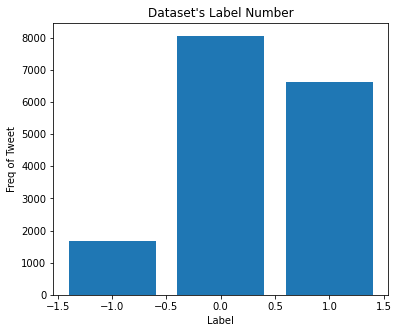

In [ ]:
import matplotlib.pyplot as plt
df = data
fig = plt.figure(figsize=(6,5))
sentiment_count = df.groupby('label').count()
plt.bar(sentiment_count.index.values, sentiment_count['tweet'])
plt.xlabel('Label')
plt.ylabel('Freq of Tweet')
plt.title('Dataset\'s Label Number')
plt.show()

In [ ]:
df.label.value_counts()

 0    8058
 1    6617
-1    1680
Name: label, dtype: int64

# Resampling

In [ ]:
from sklearn.utils import resample
#Just make use resampling method for imbalance data
fraud0 = df[df['label'] == 0]
fraud1 = df[df['label'] == 1]
not_fraud = df[df['label'] == -1]

# upsample minority
fraud_upsampled0 = resample(fraud0,
                          replace=True, # sample with replacement
                          n_samples=len(fraud1), # match number in majority class
                          random_state=27) # reproducible results
# fraud_upsampled1 = resample(fraud1,
#                           replace=True, # sample with replacement
#                           n_samples=len(not_fraud), # match number in majority class
#                           random_state=27) # reproducible results

# combine majority and upsampled minority
df = pd.concat([not_fraud, fraud_upsampled0, fraud1])

# check new class counts
df.label.value_counts()

Series([], Name: label, dtype: int64)

In [ ]:
df.to_csv('resampled_data.csv')

In [ ]:
df.label.value_counts()

In [ ]:
# length of all tweets
a=[]
for i in range(len(df)):
  a.append(len(df['tweet'].iloc[i].split()))
max(a)

59

# Dowload more info from Twitter

In [ ]:
pip install python-twitter

In [ ]:
import tweepy
from tweepy import *
 
import pandas as pd
import csv
import re 
import string
# import preprocessor as p

# mohit sir
# access_key="3650385738-4EjEFRCqLVEPo7kHc68GnTGx8wqR6HOzqGKWNwu"
# access_secret="2oUG7dQzkUkjiiny812h5nMIcFY6kw1g1M35TvkkAnBC9"
# consumer_key = "LgYTSssW7lixkOqro8h0MWMVb"
# consumer_secret="XERDrvUTRJFPGHMIQGmXeB2PYUCjHwEHACA9w6h2NZTMQBkK6Y"
 
# shivangi
consumer_key = "VVyFBTE1QgYCtE5M7K8mOQW4K"
consumer_secret = "PrOuAoseiDapPp8Sex7QQaW7Ki3EvujE13i1TiSFpPyhIKxTA6"
access_key= "905153129582354432-iJT7Fg7y1maFEsruuwhlBq021PPXPUK"
access_secret = "Y3ARKf56wMxodkFkcYTtOVKez88iKcithz00L3F3ndGS6"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, compression=True)

In [ ]:
Id = list(our_data.id.values)
Id[:10]

In [ ]:
tweet = open("Tweet.csv",'a')
first_hop_count=0
for id in Id:
  try:
    first_hop_count=first_hop_count +1
    status = api.get_status(id)
    tweet.write(str(status.user.screen_name)+",")
    # tweet.write(str(status.user.id)+",")
    # tweet.write(str(status.created_at)+",")
    # tweet.write(status.text+",")
    # tweet.write(str(status.entities)+",")
    # tweet.write(status.source+",")
    # tweet.write(status.source_url+",")
    # tweet.write(str(status.in_reply_to_status_id_str)+",")
    # tweet.write(str(status.in_reply_to_user_id)+",")
    tweet.write(str(status.in_reply_to_screen_name)+",")
    tweet.write(str(status.retweet_count)+",")
    # tweet.write(str(status.favorite_count)+",")
    # tweet.write(status.user.description+",")
    tweet.write(str(status.user.followers_count)+",")
    tweet.write(str(status.user.friends_count)+",")
    tweet.write(str(status.user.statuses_count)+",")
    tweet.write(str(status.user.verified)+",")
    # tweet.write(str(status.user.protected)+",")
    # tweet.write(str(status.user.entities)+",")
    tweet.write(str(status.user.name))
    tweet.write('\n')
    tweet.flush()
    print(first_hop_count)
  except:
    print("user not available")
    continue
tweet.close()

# length of tweets in each class

In [ ]:
# determining length of each tweet of each class --> plot some histogram
# length of all tweets
df = Antivax_data
a=[]
for i in range(len(df)):
  a.append(len(Antivax_data['tweet'].iloc[i].split()))
print(max(a))
df = Provax_data
b=[]
for i in range(len(df)):
  b.append(len(df['tweet'].iloc[i].split()))
print(max(b))
df = Neutral_data
c=[]
for i in range(len(df)):
  c.append(len(df['tweet'].iloc[i].split()))
print(max(c))

57
59
53


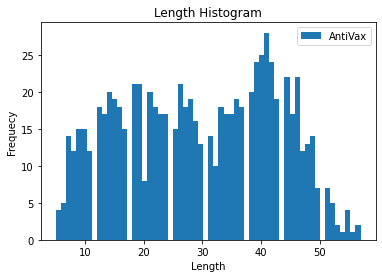

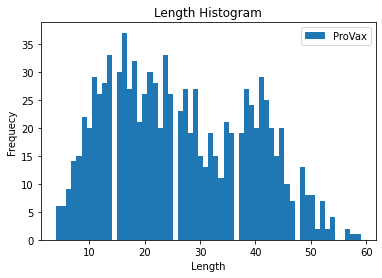

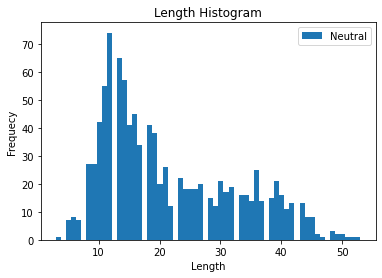

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
plt.hist(a,bins= 60, label = "AntiVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(b,bins= 60, label = "ProVax")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()
plt.hist(c, bins= 60, label = "Neutral")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Length Histogram')

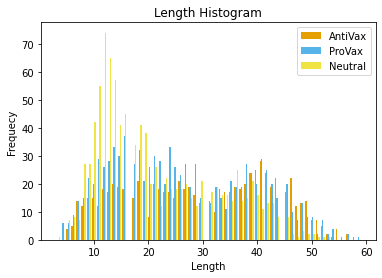

In [ ]:
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ["AntiVax","ProVax","Neutral"]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([a,b,c], bins = int(60),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.title('Length Histogram')

# More Tweet Data

In [ ]:
Tweet_df = pd.read_csv("TweetData.csv")
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   srno             2792 non-null   object 
 1   label            2792 non-null   object 
 2   id               2792 non-null   float64
 3   tweet            2792 non-null   object 
 4   followers_count  2706 non-null   float64
 5   friends_count    2706 non-null   float64
 6   statuses_count   2706 non-null   float64
 7   verified         2706 non-null   object 
 8   name             2706 non-null   object 
dtypes: float64(4), object(5)
memory usage: 196.4+ KB


In [ ]:
Tweet_df_available = Tweet_df[:2706]
Tweet_df_available

,srno,label,id,tweet,followers_count,friends_count,statuses_count,verified,name
0,1,AntiVax,1.325680e+18,Coronavirus: Some Canadians hesitant to take a...,281.0,1168.0,254712.0,False,Today's news summary
1,2,Neutral,1.325680e+18,Moderna on track to report late-stage COVID-19...,3246.0,3.0,401443.0,False,Jewish Community
2,3,Neutral,1.325690e+18,The Philippine government is in talks with Ang...,3244351.0,1828.0,972999.0,True,Inquirer
3,4,Neutral,1.325690e+18,Care homes to be FIRST to receive coronavirus ...,196.0,117.0,146446.0,False,Newslanes
4,5,AntiVax,1.325700e+18,This is why thinking that a vaccine is a panac...,376.0,560.0,6336.0,False,suphil Philipose
...,...,...,...,...,...,...,...,...,...
2701,2788,Neutral,1.325970e+18,If a COVID-19 vaccine is effective it will be ...,3237.0,656.0,55616.0,False,Preston Leigh
2702,2789,Neutral,1.325770e+18,"Pfizer claims coronavirus vaccine success, pla...",360.0,1702.0,31668.0,False,Felipe Niño
2703,2790,ProVax,1.325780e+18,pump dat #COVID19 vaccine 💪😷🔥 https://t.co/Dna...,6640.0,6910.0,98935.0,False,~C4Chaos🔆
2704,2791,AntiVax,1.325990e+18,"LOL, not a chance I would get any vaccine let ...",41.0,149.0,488.0,False,We Tried To Warn You


In [ ]:
Tweet_df_unavailable = Tweet_df[2707:]
Tweet_df_unavailable

,srno,label,id,tweet,followers_count,friends_count,statuses_count,verified,name
2707,user not available,AntiVax,1.326180e+18,@sensibilisfella Covid19 has a 99.9% survival ...,NaN,NaN,NaN,NaN,NaN
2708,user not available,AntiVax,1.328850e+18,I’m not an anti-vax but I’m nervous to get Ell...,NaN,NaN,NaN,NaN,NaN
2709,user not available,ProVax,1.329080e+18,I am going to drink the Coronavirus vaccine,NaN,NaN,NaN,NaN,NaN
2710,user not available,AntiVax,1.325790e+18,I'm not a big conspiracy person and honestly e...,NaN,NaN,NaN,NaN,NaN
2711,user not available,ProVax,1.326130e+18,Same vibes. Seriously good news about a vaccin...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2787,user not available,ProVax,1.332820e+18,@RepsForBiden I will take a coronavirus vaccin...,NaN,NaN,NaN,NaN,NaN
2788,user not available,AntiVax,1.325880e+18,Who in their right mind would want a vaccine a...,NaN,NaN,NaN,NaN,NaN
2789,user not available,AntiVax,1.325780e+18,no thanks i'm not taking the antichrist vaccin...,NaN,NaN,NaN,NaN,NaN
2790,user not available,ProVax,1.325810e+18,"People!!! Seriously, there is still no 100% va...",NaN,NaN,NaN,NaN,NaN


In [ ]:
Tweet_df_unavailable.label.value_counts()

AntiVax    38
ProVax     26
Neutral    21
Name: label, dtype: int64

In [ ]:
Tweet_df_available.label.value_counts()

Neutral    989
ProVax     965
AntiVax    752
Name: label, dtype: int64

In [ ]:
Tweet_df_available.verified.value_counts()

False    2434
True      272
Name: verified, dtype: int64

### **Verified Accounts moslty post Neutral or ProVax Tweets and Very less AntiVax Tweets**

In [ ]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['verified'].iloc[i] == True:
    if Tweet_df_available['label'].iloc[i] == "Neutral":
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == "AntiVax":
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == "ProVax":
      ProVax = ProVax + 1
  count = count + 1
print(Neutral, AntiVax, ProVax, count)

169 6 97 2706


In [ ]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
Tweet_df_available = df
for i in range(len(df)):
  if Tweet_df_available['verified'].iloc[i] == True:
    if Tweet_df_available['label'].iloc[i] == 0:
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == -1:
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == 1:
      ProVax = ProVax + 1
  count = count + 1
print(Neutral, AntiVax, ProVax, count)

259 50 215 16355


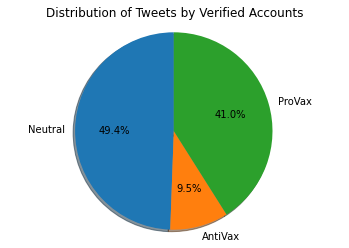

In [ ]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [259, 50, 215]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets by Verified Accounts")
plt.show()

### People with more than 10000 followers, tends to tweet more Neutral and ProVax Tweets 

In [ ]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['followers_count'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == "Neutral":
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == "AntiVax":
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == "ProVax":
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

215 34 121 370


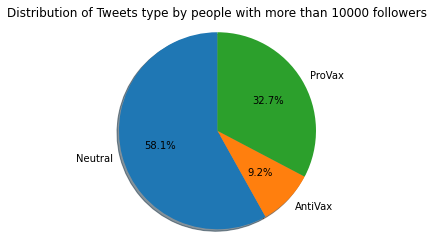

In [ ]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [215, 34, 121]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 followers")
plt.show()

### **People with more than 1000 friends, tends to post mre neutral and ProVax tweets**

In [ ]:
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['friends_count'].iloc[i] > 1000:
    if Tweet_df_available['label'].iloc[i] == "Neutral":
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == "AntiVax":
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == "ProVax":
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

381 274 368 1023


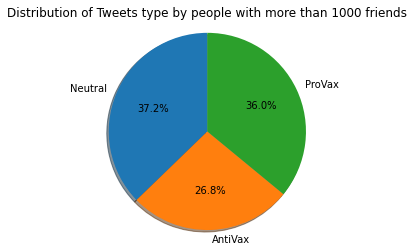

In [ ]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [381, 274, 368]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 1000 friends")
plt.show()

### **People who usually posts more than 10000 statuses on their walls, tends to speak about ProVax or Neutral in their Tweets**

In [ ]:
# statuses_count
Neutral, AntiVax, ProVax, count =0,0, 0,0
for i in range(len(Tweet_df_available)):
  if Tweet_df_available['statuses_count'].iloc[i] > 10000:
    if Tweet_df_available['label'].iloc[i] == "Neutral":
      Neutral = Neutral + 1
    elif Tweet_df_available['label'].iloc[i] == "AntiVax":
      AntiVax = AntiVax + 1
    elif Tweet_df_available['label'].iloc[i] == "ProVax":
      ProVax = ProVax + 1
    count = count + 1
print(Neutral, AntiVax, ProVax, count)

632 392 461 1485


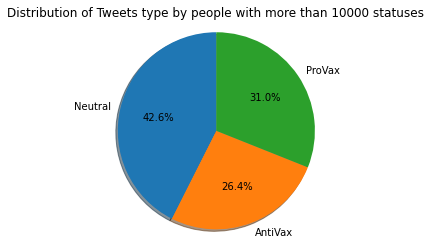

In [ ]:
# Piechart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'AntiVax', 'ProVax'
sizes = [632, 392, 461]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Tweets type by people with more than 10000 statuses")
plt.show()

# NER Tagging in the tweets

In [ ]:
df = Neutral_data
a=[]
for i in range(len(df)):
  a.append(df['tweet'].iloc[i].split())
print(a)

[['Moderna', 'on', 'track', 'to', 'report', 'late-stage', 'COVID-19', 'vaccine', 'data', 'next', 'month:', 'The', 'vaccine', 'is', 'currently', 'being', 'tested', 'in', 'a', 'large', 'human', 'trial,', 'and', 'Moderna', 'was', 'in', 'talks', 'with', 'a', 'WHO-led', 'group', 'for', 'distribution.', 'https://t.co/CJGuw7rDzj', 'JPost', 'https://t.co/QPAhjvDm76'], ['The', 'Philippine', 'government', 'is', 'in', 'talks', 'with', 'Anglo-Swedish', 'drugmaker', 'AstraZeneca', 'to', 'procure', 'doses', 'of', 'its', 'prospective', 'COVID-19', 'vaccine.', '|', '@DYGalvezINQ', 'https://t.co/dVTpgOZT9h'], ['Care', 'homes', 'to', 'be', 'FIRST', 'to', 'receive', 'coronavirus', 'vaccine', 'that', 'could', 'roll', 'out', 'before', 'Christmas', 'https://t.co/V71edGrw7F'], ['Hospitals', 'are', 'reportedly', 'being', 'prepped', 'for', 'a', 'possible', 'coronavirus', 'vaccine', 'roll', 'out', 'within', 'three', 'weeks.', '@Drhilaryjones', 'says', 'it', 'is', 'optimistic', 'to', 'think', 'many', 'people', '

In [ ]:
import pickle
with open('neutral_list.pkl', 'wb') as f:
  pickle.dump(a, f)

In [ ]:
with open('neutral_list.pkl', 'rb') as f:
  neutral_list = pickle.load(f)
with open('antivax_list.pkl', 'rb') as f:
  antivax_list = pickle.load(f)
with open('provax_list.pkl', 'rb') as f:
  provax_list = pickle.load(f)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(provax_list[0])
sent

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('More', 'RBR'),
 ('good', 'JJ'),
 ('news!!!', 'NN'),
 ('I', 'PRP'),
 ('could', 'MD'),
 ('get', 'VB'),
 ('used', 'VBN'),
 ('to', 'TO'),
 ('this', 'DT'),
 ('Covid-19', 'JJ'),
 ('vaccine', 'NN'),
 ('candidate', 'NN'),
 ('is', 'VBZ'),
 ('90%', 'CD'),
 ('effective,', 'NN'),
 ('says', 'VBZ'),
 ('manufacturer', 'NN'),
 ('https://t.co/wtpyAh71pU', 'NN')]

# Word Frequency of AntiVax Tweets

In [ ]:
df = Antivax_data

In [ ]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

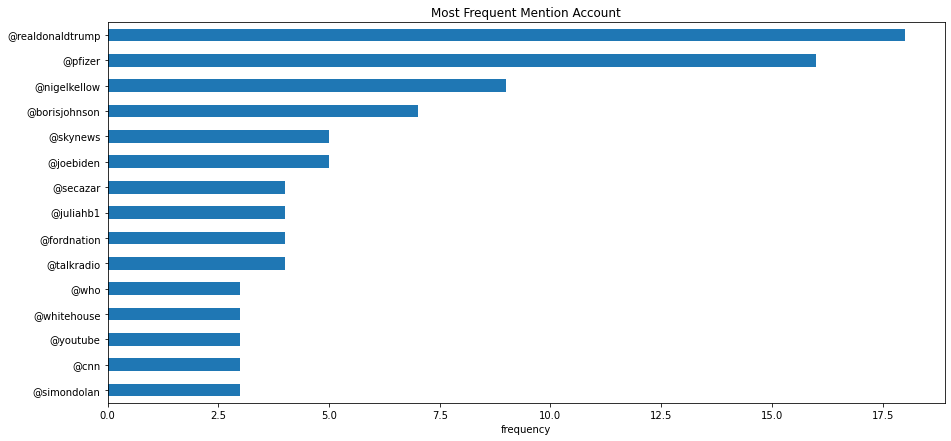

In [ ]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [ ]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

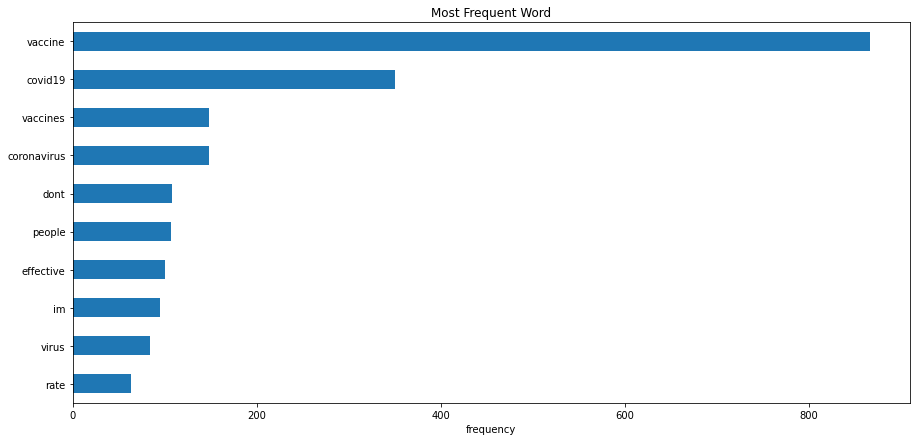

In [ ]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of ProVax Tweets

In [ ]:
df = Provax_data

In [ ]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

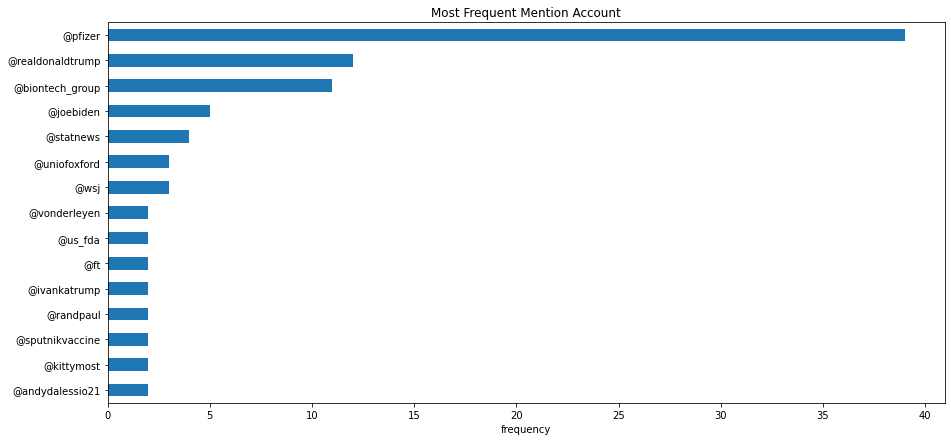

In [ ]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [ ]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

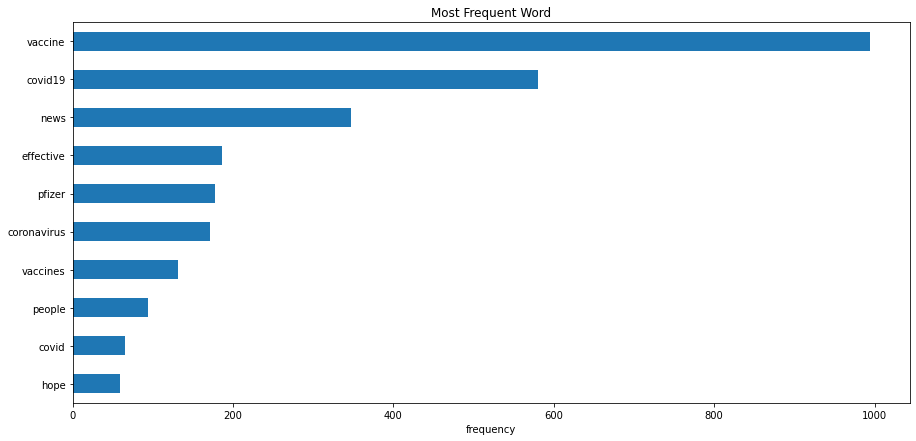

In [ ]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# Word Frequency of Neutral Tweets

In [ ]:
df = Neutral_data

In [ ]:
list_user = []
list_word = []
import re
for sentence in df['tweet']:
  for word in sentence.split():
    if '@' in word:
      mention = re.findall('\w*(@\w+)',word.lower())
      list_user += mention
    else:
      if word != '':
        list_word.append(re.sub('[^A-Za-z0-9]+', '', word.lower()))

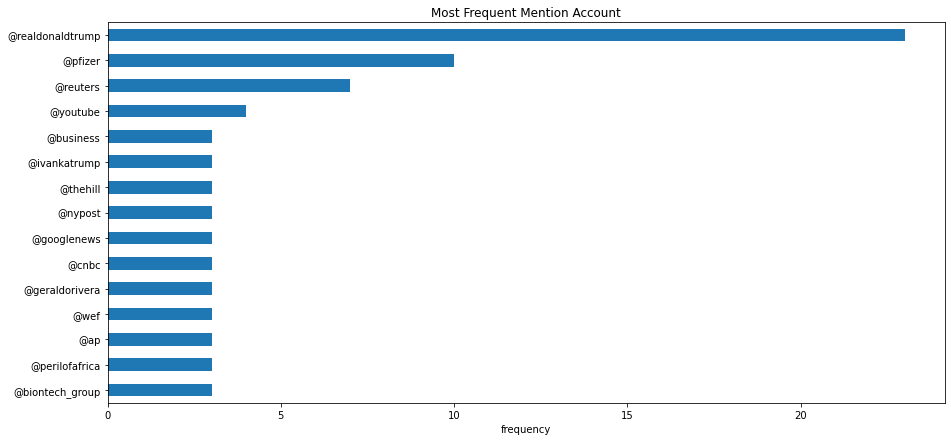

In [ ]:
mention_data = pd.DataFrame({'username' : list_user})['username'].value_counts()
mention_data.head(15).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Mention Account')
plt.xlabel('frequency')
plt.show()

In [ ]:
#get stopword from file
stp = open('twitter_stp.dic')
stp_words = []
items = stp.readline()
while items != "":
  stp_words.append(items[:-1]) #just read word without /n
  items = stp.readline()
stp_words.append('90')

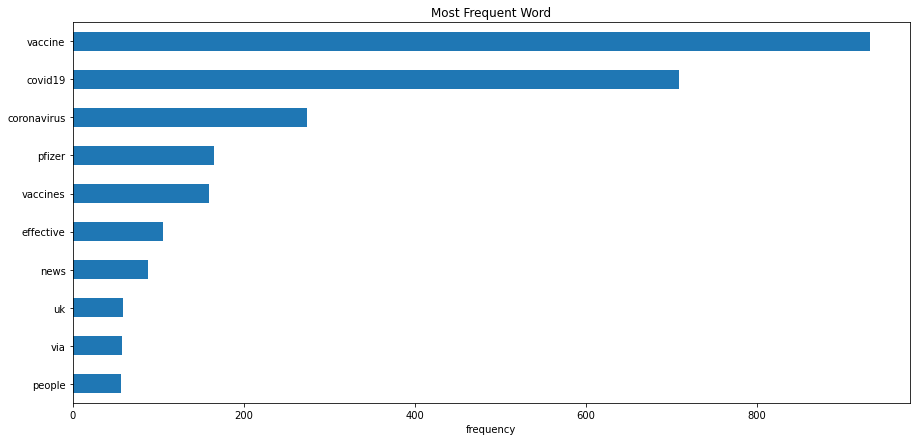

In [ ]:
word_count = []
for word in list_word:
  if word not in stp_words and word != '':
    word_count.append(word)
word_data = pd.DataFrame({'word': word_count})['word'].value_counts()
word_data.head(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,7),title='Most Frequent Word')
plt.xlabel('frequency')
plt.show()

# NER Tagging ProVax

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    # sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
Provax_NER = []
for i in range(len(provax_list)):
  sent = preprocess(provax_list[i])
  Provax_NER.append(sent)
Provax_NER[0]

In [ ]:
Provax_NER

In [ ]:
df = pd.DataFrame(Provax_NER)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,"(More, RBR)","(good, JJ)","(news!!!, NN)","(I, PRP)","(could, MD)","(get, VB)","(used, VBN)","(to, TO)","(this, DT)","(Covid-19, JJ)","(vaccine, NN)","(candidate, NN)","(is, VBZ)","(90%, CD)","(effective,, NN)","(says, VBZ)","(manufacturer, NN)","(https://t.co/wtpyAh71pU, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"(Great, JJ)","(job, NN)","(by, IN)","(the, DT)","(#Pfizer, NNP)","(#vaccine, JJ)","(scientists, NNS)","(who, WP)","(look, VBP)","(to, TO)","(have, VB)","(come, VBN)","(up, RP)","(with, IN)","(a, DT)","(viable, JJ)","(candidate., NN)","(Fingers, NNS)","(crossed, VBD)","(that, IN)","(they, PRP)","(hit, VBP)","(their, PRP$)","(long-term, JJ)","(efficacy, NN)","(endpoints(s), NN)","(and, CC)","(the, DT)","(safety, NN)","(outcomes, VBZ)","(don't, JJ)","(put, VBD)","(the, DT)","(kibosh, NN)","(on, IN)","(it., NN)","(#Pharma, NN)","(https://t.co/94b0EErqsp, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"(I’m, NNP)","(only, RB)","(gonna, VBD)","(take, VB)","(the, DT)","(vaccine, NN)","(because, IN)","(if, IN)","(my, PRP$)","(great, JJ)","(great, JJ)","(grandkids, NNS)","(die, NN)","(of, IN)","(COVID-19, NNP)","(it, PRP)","(will, MD)","(be, VB)","(100%, CD)","(my, PRP$)","(fault, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(I, PRP)","(wonder, VBP)","(what, WP)","(the, DT)","(logistics, NNS)","(of, IN)","(a, DT)","(Covid-19, JJ)","(vaccine, NN)","(are., NN)","(Will, NNP)","(nations, NNS)","(share, NN)","(the, DT)","(vaccines, NNS)","(across, IN)","(borders, NNS)","(or, CC)","(will, MD)","(they, PRP)","(prioritise, VB)","(their, PRP$)","(citizens?, NN)","(Either, DT)","(way,, NN)","(this, DT)","(sounds, VBZ)","(like, IN)","(good, JJ)","(news!, NNS)","(https://t.co/tDGsA9Iryu, VBP)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"(great, JJ)","(news!, NNS)","(but, CC)","(it's, VBZ)","(not, RB)","(going, VBG)","(to, TO)","(be, VB)","(available, JJ)","(for, IN)","(widespread, JJ)","(administration, NN)","(for, IN)","(several, JJ)","(months, NNS)","(likely, RB)","(so, RB)","(keep, VB)","(wearing, VBG)","(masks,, JJ)","(social, JJ)","(distancing,, NN)","(and, CC)","(avoiding, VBG)","(gatherings., NN)","(we, PRP)","(also, RB)","(are, VBP)","(going, VBG)","(to, TO)","(have, VB)","(to, TO)","(deal, VB)","(with, IN)","(the, DT)","(anti-vaxxers, NNS)","(who, WP)","(won't, VBP)","(even, RB)","(consider, VB)","(taking, VBG)","(this, DT)","(vaccine, NN)","(:/, VBZ)","(https://t.co/JRjxda0H8P, NN)",None,None,None,None,None,None,None,None,None,None,None,None,None,None
